The customer ids are unique


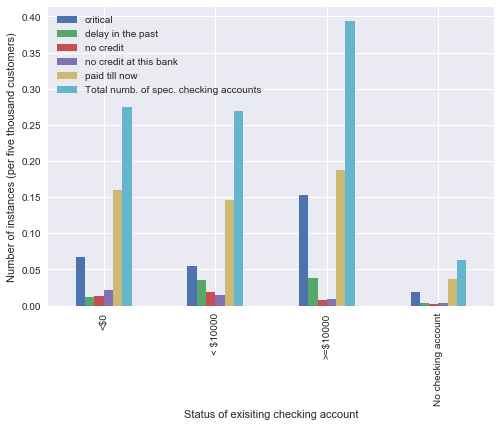

Maximum instances of different credit history+++++++++++++++
                                       Type of checking account
critical                                               >=$10000
delay in the past                                      >=$10000
no credit                                              < $10000
no credit at this bank                                      <$0
paid till now                                          >=$10000
Total numb. of spec. checking accounts                 >=$10000
Minimum instances of different credit history+++++++++++++++
                                       Type of checking account
critical                                    No checking account
delay in the past                           No checking account
no credit                                   No checking account
no credit at this bank                      No checking account
paid till now                               No checking account
Total numb. of spec. checking accounts      No

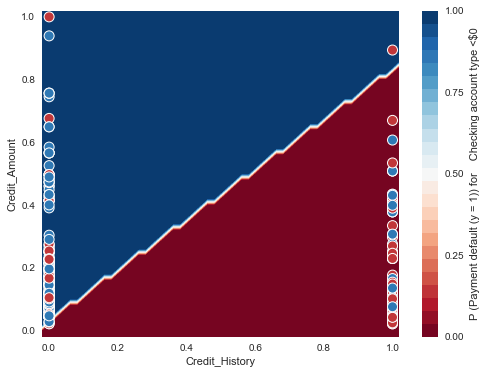

Confusion matrix with features :
['Credit_History', 'Credit_Amount']
+++++++++++++++
[[ 0.41566265  0.5480226 ]
 [ 0.18674699  0.82485876]]
+++++++++++++++


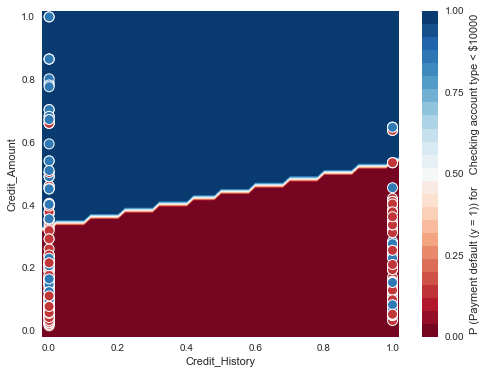

Confusion matrix with features :
['Credit_History', 'Credit_Amount']
+++++++++++++++
[[ 0.90338164  0.15384615]
 [ 0.45410628  0.27692308]]
+++++++++++++++


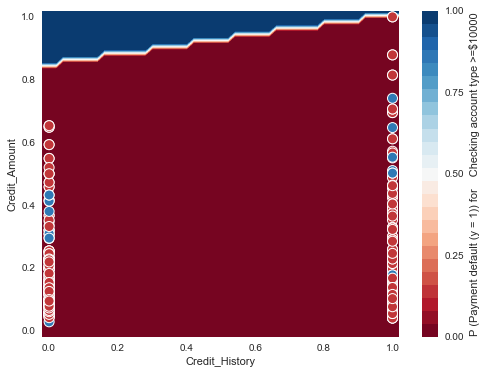

Confusion matrix with features :
['Credit_History', 'Credit_Amount']
+++++++++++++++
[[ 1.          0.        ]
 [ 0.12300683  0.        ]]
+++++++++++++++


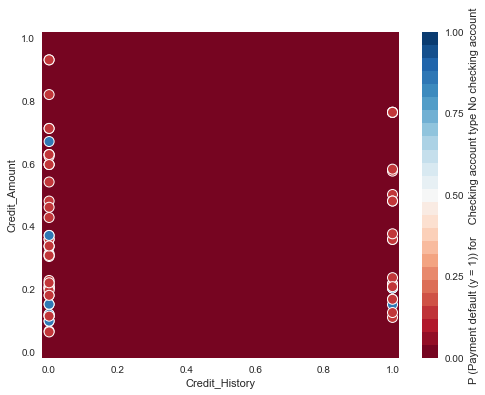

Confusion matrix with features :
['Credit_History', 'Credit_Amount']
+++++++++++++++
[[ 1.          0.        ]
 [ 0.17910448  0.        ]]
+++++++++++++++


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

file='Loan_Data.csv'

loan_df = pd.read_csv(file,skiprows=range(2))
loan_df.head()
# Removing empty columns and unnecessary column
loan_df=loan_df.dropna(axis=1, how='all')
del loan_df['Count']
loan_df.head()

# Check the Customer ids are unique 
if loan_df['Customer_ID'].is_unique:
    print "The customer ids are unique"


checkng_accnts=list(loan_df['Status_Checking_Acc'].unique())
typ_accnt=['<$0','< $10000','>=$10000','No checking account']

credt_hist=list(loan_df['Credit_History'].unique())
typ_credt=['critical','paid till now','delay in the past', 'no credit', \
           'no credit at this bank']



dict_accnt=dict(zip(['A11', 'A12', 'A14', 'A13'],typ_accnt))

dict_credt=dict(zip(['A34', 'A32', 'A33', 'A30', 'A31'],typ_credt))

loan_df['Status_Checking_Acc']=loan_df['Status_Checking_Acc'].map(dict_accnt)
loan_df['Credit_History']=loan_df['Credit_History'].map(dict_credt)


## Split the dataframe in groups of dataframes with 
## with similar checking accounts
df_ch_accnts=[pd.DataFrame()]*(len(checkng_accnts))

for index in range(len(checkng_accnts)):
    df_ch_accnts[index]=loan_df[loan_df['Status_Checking_Acc']==typ_accnt[index]]
    
    
## First we seek if there is a correlation
# between Checking account type and
# Credit history
# We construct a new datframe to visualise this
list(df_ch_accnts[0]['Status_Checking_Acc'].unique())[0]
new_df=pd.DataFrame()
for index in range(len(checkng_accnts)):
    temp_df=pd.DataFrame()
    temp_df=pd.DataFrame(df_ch_accnts[index]['Credit_History'].\
                         value_counts())
    temp_df=temp_df.transpose()
    temp_df['Status_Checking_Acc']=list(df_ch_accnts[index]['Status_Checking_Acc'].\
                                        unique())[0]
    temp_df.index=temp_df['Status_Checking_Acc']
    del temp_df['Status_Checking_Acc']
    new_df=new_df.append(temp_df)


## Since the status of exisiting checking account varies
## we can normalise the total number of customers with different checking
## accounts to 1
normlsd_df=new_df
tot_customers=new_df.transpose().sum().sum()
normlsd_df['Total numb. of spec. checking accounts']=normlsd_df.\
transpose().sum()
normlsd_df=normlsd_df.iloc[:,:].div(tot_customers, axis=0)
normlsd_df.reset_index().plot(x='Status_Checking_Acc', y=list(normlsd_df.columns),\
                              kind='bar')
plt.xlabel("Status of exisiting checking account")
plt.ylabel("Number of instances (per five thousand customers)")
plt.show()
space='+'*15
print "Maximum instances of different credit history"+ str(space)
print pd.DataFrame(normlsd_df.idxmax(axis=0),\
                   columns=['Type of checking account'])
print "Minimum instances of different credit history"+ str(space)
print pd.DataFrame(normlsd_df.idxmin(axis=0),\
                   columns=['Type of checking account'])


# Constructing DataFrame with reduced features
reduced_featur_list=[
'Customer_ID','Status_Checking_Acc','Credit_History','Credit_Amount','Job',\
    'Default_On_Payment']
redcd_ft_df=[df_ch_accnts[indx].loc[:,reduced_featur_list]\
             for indx in \
             range(len(df_ch_accnts))]

# Lets partition the credity history into two blocks: 
#good (0 no default on loan payment) or bad (1 default on loan payment)!
credt_histry=['critical',
 'paid till now',
 'delay in the past',
 'no credit',
 'no credit at this bank']
bin_outcm=[1,0,1,0,0]
map_credt=dict(zip(credt_histry,bin_outcm))

## Job mapping into two blocks again
## Employed or not employed
### 0 is employed, 1 is unemployed
job_histry=['A171', 'A172', 'A173', 'A174']
bin_job=[1,1,0,0]
map_job=dict(zip(job_histry,bin_job))

map_lst=[redcd_ft_df[indx]['Credit_History'].\
         map(map_credt) for indx in \
         range(len(redcd_ft_df))]
for indx in range(len(redcd_ft_df)):
    redcd_ft_df[indx]['Credit_History']=map_lst[indx]
    
job_lst=[redcd_ft_df[indx]['Job'].map(map_job) for indx \
         in range(len(redcd_ft_df))]
for indx in range(len(redcd_ft_df)):
    redcd_ft_df[indx]['Job']=job_lst[indx]    

redcd_ft_lst=['Credit_History', 'Credit_Amount', 'Job'][0:2]
for index in range(4):
    max_abs_scaler = preprocessing.MaxAbsScaler()
    X=max_abs_scaler.fit_transform(redcd_ft_df[index].\
                                   loc[:,redcd_ft_lst])
    y = max_abs_scaler.fit_transform(redcd_ft_df[index]\
                                     [['Default_On_Payment']])\
    .ravel()
    logreg = LogisticRegression(C=1e5)
    X_train, X_test, y_train, y_test = train_test_split\
    (X, y, test_size=0.25,random_state=42)
    logreg.fit(X_train, y_train)
    y_pred=logreg.predict(X_test)
    # Plot the decision boundary. For that, we will \
    #assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), \
                         np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, Z, 25, cmap="RdBu",
                      vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("P (Payment default (y = 1)) for\
    Checking account type "+\
                   str(list(redcd_ft_df[index]\
                            ['Status_Checking_Acc'].unique())[0]))
    ax.set_xlabel(str(redcd_ft_lst[0]))
    ax.set_ylabel(str(redcd_ft_lst[1]))
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    ax_c.set_ticks([0, .25, .5, .75, 1])
    ax.scatter(X_test[:,0], X_test[:, 1], c=y_test[:], s=100,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
    plt.show()
    C=confusion_matrix(y_test, y_pred)
    C=C / C.astype(np.float).sum(axis=1)
    print "Confusion matrix with features :" 
    print redcd_ft_lst
    print space
    print C
    print space